In [1]:
!nvidia-smi

Thu Mar 24 17:29:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!pip install simplejson --quiet
!pip uninstall -y mkl
!pip install --upgrade mxnet-cu100
!pip install autogluon
!pip install -U ipykernel

     |████████████████████████████████| 130 kB 4.2 MB/s 
Found existing installation: mkl 2019.0
Uninstalling mkl-2019.0:
  Successfully uninstalled mkl-2019.0
     |████████████████████████████████| 354.0 MB 4.6 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 267 kB 5.1 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 133 kB 64.2 MB/s 
     |████████████████████████████████| 48 kB 5.8 MB/s 
     |████████████████████████████████| 188 kB 45.8 MB/s 
     |████████████████████████████████| 38.1 MB 21.5 MB/s 
     |████████████████████████████████| 1.0 MB 54.8 MB/s 
     |████████████████████████████████| 802 kB 61.7 MB/s 
     |████████████████████████████████| 132 kB 69.4 MB/s 
     |████████████████████████████████| 54.7 MB 83 kB/s 
     |████████████████████████████████| 296

     |████████████████████████████████| 130 kB 5.0 MB/s 
     |████████████████████████████████| 793 kB 45.9 MB/s 
     |████████████████████████████████| 380 kB 60.0 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requ

In [2]:
import os
import simplejson as json
import pandas as pd

import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
np.random.seed(123)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path_to_data_nico = "/content/drive/My Drive/Master Big Data /Tesis Big Data/Dataset_Facturas/Json_Facturas"
path_to_data_seba = "/content/drive/My Drive/Tesis Big Data/Dataset_Facturas/Json_Facturas"
path_to_data_nacho = "/content/drive/MyDrive/Dataset_Facturas/Json_Facturas"


path_to_data = path_to_data_nacho

In [6]:
#Carpetas a analizar
folders_to_process = ["La Comercial SRL","Modadol","Fernando Garcia","Ayala","Antilur","La Banderita","Los Nietitos","Marioni","Masula"]

In [7]:
MIN_CONF = 50

def remove_unconfident_words(doc_conf, doc_text):
    idx_to_remove = []
    for idx, conf in enumerate(doc_conf):
        if conf < MIN_CONF or doc_text[idx] == " ":
            idx_to_remove.append(idx)

    for index in sorted(idx_to_remove, reverse=True):
        del doc_text[index]

    return doc_text


# Open a file
dirs = os.listdir(path_to_data)
# This would print all the files and directories
df = pd.DataFrame()
data = []
for folder in dirs:
  if folder in folders_to_process:
    file_dirs = os.listdir(path_to_data+"/"+folder)
    for file in file_dirs:
      doc = open(f"{path_to_data}/{folder}/{file}")
      json_doc = json.load(doc)
      doc_conf = json_doc["OCR_Data"]["conf"]
      doc_text = json_doc["OCR_Data"]["text"]
      doc_text = remove_unconfident_words(doc_conf, doc_text)
      doc_text = " ".join(doc_text)
      data.append({"vendor": folder, "text": doc_text})

df = df.append(data, ignore_index=True)
df["text"] = df["text"].replace("\s+", " ", regex=True).str.lower()

df["label"] = df["vendor"].rank(method="dense").astype(int)
df["label"] -= 1

print(df.head(20))

     vendor                                               text  label
0   Marioni  vendedor 23-01-2008 02.003823.0016. por 7696-r...      6
1   Marioni  | numero vendedor pimalan guerra 0 credito 540...      6
2   Marioni  cliente filco s.a total desc. tipo de docunent...      6
3   Marioni  para maquinaria agricola - tornille ferrecar l...      6
4   Marioni  cliente perez ortiz jose lte telefono 136276 i...      6
5   Marioni   client tipo de documento numer( romero diaz (...      6
6   Marioni         [ 60/11/90 wa op 9% op un et) quinn 7 nano      6
7   Marioni   vendedor credito 136374 rut. cant. y campanas...      6
8   Marioni  m tipo dedocunento vendedor romero diaz (villa...      6
9   Marioni   departamento tipo de documento vendedor 23-01...      6
10  Marioni  | maquinaria agric vende rodriguez anabella ru...      6
11  Marioni  cliente domicilio departamento telefono numero...      6
12  Marioni  - x v; vi ola % 0z- 0g § 00'0 30 000 ma nodv.l...      6
13  Marioni         

In [8]:
train_df, test_df = train_test_split(df[['label', 'text']], test_size=0.2)
train_df.shape, test_df.shape

((3265, 2), (817, 2))

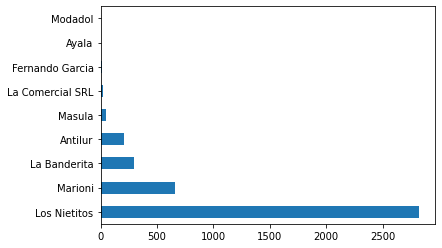

In [9]:
df["vendor"].value_counts().plot(kind="barh");

In [10]:
df[["label", "vendor"]].value_counts()

label  vendor          
5      Los Nietitos        2826
6      Marioni              656
3      La Banderita         292
0      Antilur              212
7      Masula                52
4      La Comercial SRL      19
2      Fernando Garcia       11
1      Ayala                  7
8      Modadol                7
dtype: int64

In [11]:
train_df, test_df = train_test_split(df[['label', 'text']], test_size=0.2, random_state=1, shuffle=True)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=1, shuffle=True) # 0.25 x 0.8 = 0.2

In [12]:
from autogluon.text import TextPredictor

predictor = TextPredictor(label="label", eval_metric='acc',path='./ag_sst')
predictor.fit(train_df, time_limit=120, tuning_data=val_df)

Global seed set to 123


Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                         | Params
-------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 108 M 
1 | validation_metric | Accuracy                     | 0     
2 | loss_func         | CrossEntropyLoss             | 0     
-------------------------------------------------------------------
108 M     Trainable params
0         Non-trainable params
108 M     Total params
217.797   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 123


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 9: val_acc reached 0.74051 (best 0.74051), saving model to "/content/ag_sst/epoch=0-step=9.ckpt" as top 3
tcmalloc: large alloc 1092804608 bytes == 0x5604d75ee000 @  0x7f6e5bbd7615 0x5603e44d63bc 0x5603e45b718a 0x5603e44dce0c 0x7f6e2ae469e4 0x7f6e2ae4eb14 0x7f6e2ae23a60 0x7f6d82601f55 0x7f6d825fd88e 0x7f6d82605235 0x7f6e2ae23fae 0x7f6e2a59aaa8 0x5603e44d9f78 0x5603e454da6d 0x5603e454866e 0x5603e44daaba 0x5603e4548eae 0x5603e454802f 0x5603e44daaba 0x5603e454d2c0 0x5603e44da9da 0x5603e4548eae 0x5603e454802f 0x5603e44daaba 0x5603e4549108 0x5603e44da9da 0x5603e4549108 0x5603e454802f 0x5603e44daaba 0x5603e4549108 0x5603e454802f
tcmalloc: large alloc 1366007808 bytes == 0x56051881c000 @  0x7f6e5bbd7615 0x5603e44d63bc 0x5603e45b718a 0x5603e44dce0c 0x7f6e2ae469e4 0x7f6e2ae4eb14 0x7f6e2ae23a60 0x7f6d82601f55 0x7f6d825fd88e 0x7f6d82605235 0x7f6e2ae23fae 0x7f6e2a59aaa8 0x5603e44d9f78 0x5603e454da6d 0x5603e454866e 0x5603e44daaba 0x5603e4548eae 0x5603e454802f 0x5603e44daaba 0x5

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 17: val_acc reached 0.96083 (best 0.96083), saving model to "/content/ag_sst/epoch=0-step=17.ckpt" as top 3


In [19]:
test_score = predictor.evaluate(test_df, metrics=['f1_macro'])
print(test_score)


Predicting: 0it [00:00, ?it/s]

{'f1_macro': 0.21137777777777778}


In [22]:

test_score = predictor.evaluate(test_df, metrics=['f1_micro'])
print(test_score)

Predicting: 0it [00:00, ?it/s]

{'f1_micro': 0.8506731946144431}


In [39]:
y_pred = predictor.predict(test_df)
print(y_pred)

Predicting: 0it [00:00, ?it/s]

3327    5
1892    5
486     5
3799    5
1400    5
       ..
756     5
4064    5
3970    5
2811    3
1089    3
Name: label, Length: 817, dtype: int64


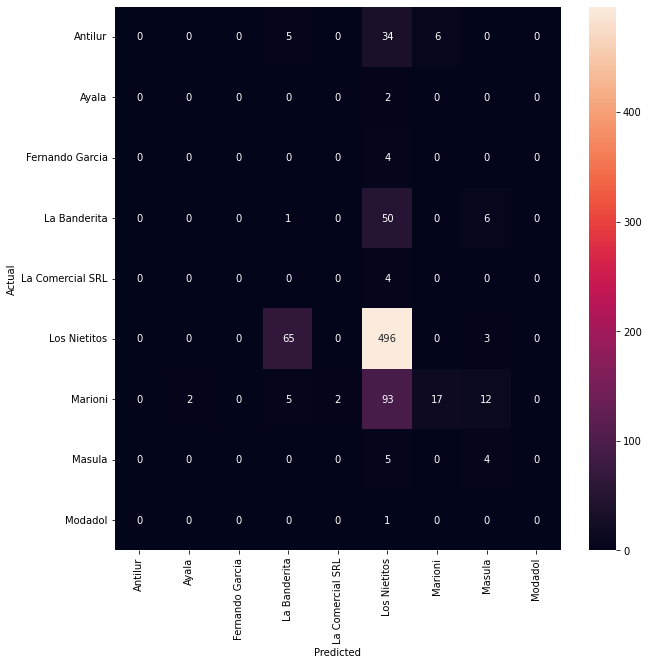

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

category_id_df = df[['vendor', 'label']].drop_duplicates().sort_values('label')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['label', 'vendor']].values)


conf_mat = confusion_matrix(test_df['label'], y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.vendor.values, yticklabels=category_id_df.vendor.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
test_df

,label,text
3327,5,los nietitos s.a rut 04 009872 0014 20 de ener...
1892,5,20 de enero 3618 montevideo-montevideo telefax...
486,6,t22get | % a 91000 | § wn) 800z-10-60 a n38ny -
3799,3,— panificadora argentina sa panaderia argentin...
1400,5,los nietitos s.a 20 de enero 3618 rut 04 00987...
...,...,...
756,0,antilur s.a. rut. 214200240016 faith pago tipo...
4064,4,venta de la comercial s.r.l. rut 212100540011 ...
3970,3,panieicadora argentina sa panai argentina blvr...
2811,5,"los nietitos s.a 20 de enero, 3618 rut 04 0098..."


In [27]:
y_pred

3327    5
1892    5
486     5
3799    5
1400    5
       ..
756     5
4064    5
3970    5
2811    3
1089    3
Name: label, Length: 817, dtype: int64

In [41]:
from sklearn.metrics import f1_score

f1_score(test_df['label'], y_pred,average='macro') 

0.14031231695586469

In [24]:
def get_group_samples(group):
    groups_median_size = int(label_groups.size().median())
    if len(group) > groups_median_size:
        return group.sample(groups_median_size).reset_index(drop=True)
    else:
        return group.reset_index(drop=True)

label_groups = df.groupby("label")
df_balanced = label_groups.apply(get_group_samples)


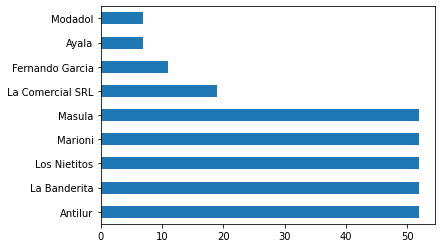

In [25]:
df_balanced["vendor"].value_counts().plot(kind="barh");

In [ ]:
train_df, test_df = train_test_split(df_balanced[['label', 'text']], test_size=0.2, random_state=1, shuffle=True)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=1, shuffle=True) # 0.25 x 0.8 = 0.2

Problem Type="multiclass"
Column Types:
   - "label": categorical
   - "text": text

The GluonNLP V0 backend is used. We will use 2 cpus and 1 gpus to train each trial.


All Logs will be saved to /content/ag_sst/task0/training.log


Fitting and transforming the train data...
Done! Preprocessor saved to /content/ag_sst/task0/preprocessor.pkl
Process dev set...
Done!
Max length for chunking text: 512, Stochastic chunk: Train-False/Test-False, Test #repeat: 1.
#Total Params/Fixed Params=108990853/0
Using gradient accumulation. Global batch size = 128
Local training results will be saved to /content/ag_sst/task0/results_local.jsonl.
[Iter 1/60, Epoch 0] train loss=2.24e+00, gnorm=2.31e+01, lr=1.67e-05, #samples processed=128, #sample per second=3.31. ETA=38.07min
[Iter 2/60, Epoch 0] train loss=1.53e+00, gnorm=9.10e+00, lr=3.33e-05, #samples processed=128, #sample per second=3.26. ETA=37.68min
[Iter 2/60, Epoch 0] valid accuracy=6.3596e-01, log_loss=1.1614e+00, time spent=23.287s, total time spent=1.74min. Find new best=True, Find new top-3=True
[Iter 3/60, Epoch 0] train loss=1.21e+00, gnorm=6.21e+00, lr=5.00e-05, #samples processed=128, #sample per second=1.96. ETA=45.34min
[Iter 4/60, Epoch 0] train loss=1.25e+00, 

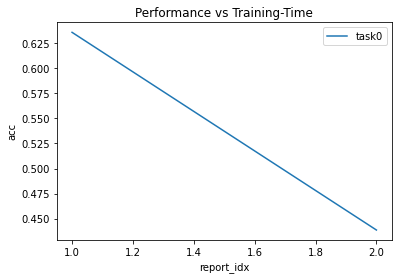

Training completed. Auto-saving to "./ag_sst/". For loading the model, you can use `predictor = TextPredictor.load("./ag_sst/")`


In [ ]:
from autogluon.text import TextPredictor

predictor_balanced = TextPredictor(label="label", path='./ag_sst')
predictor_balanced.fit(train_df, time_limit=120, tuning_data=val_df)

In [ ]:
test_score = predictor.evaluate(test_df)
print(test_score)

0.25877192982456143


In [ ]:
y_pred = predictor.predict(test_df)
print(y_pred)

label     
1      102    2
2      84     2
       131    2
3      161    2
4      6      2
             ..
0      191    2
1      98     2
       133    2
       36     2
       290    2
Name: label, Length: 228, dtype: int64


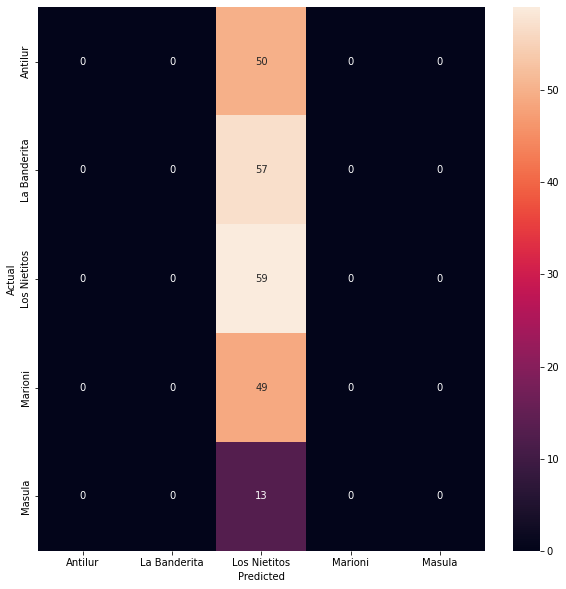

In [ ]:
conf_mat = confusion_matrix(test_df['label'], y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.vendor.values, yticklabels=category_id_df.vendor.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()